In [18]:
import mglearn
import scipy as sp
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('font',family ='Malgun Gothic')
from preamble import *


In [17]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.8.6
IPython 7.18.1

sklearn 0.23.2
numpy 1.19.3
scipy 1.5.3
matplotlib 3.3.2


X.shape: (26, 2)


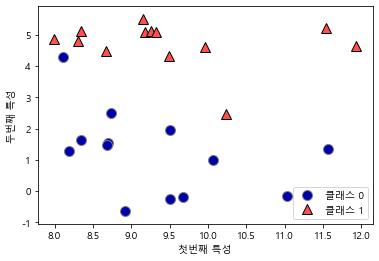

In [21]:
#데이터셋을 만듭니다
X,y = mglearn.datasets.make_forge()
#산점도를 그립니다
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")
print("X.shape:", X.shape)

Text(0, 0.5, '타깃')

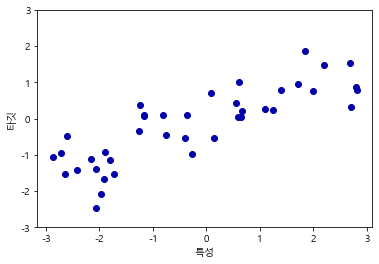

In [25]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [26]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())


cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [27]:
print("유방암 데이터의 형태", cancer.data.shape)

유방암 데이터의 형태 (569, 30)


In [28]:
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names,np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [29]:
print("특성이름:\n", cancer.feature_names)

특성이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [30]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:",boston.data.shape)

데이터의 형태: (506, 13)


In [31]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


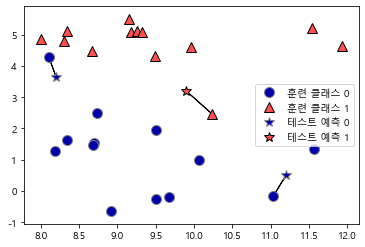

In [33]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

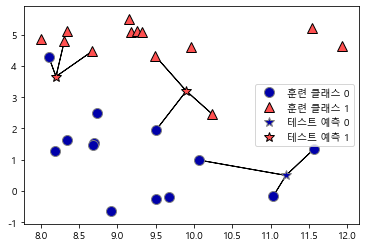

In [34]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [35]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [38]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
print("테스트 세트 예측", clf.predict(X_test))

테스트 세트 예측 [1 0 1 0 1 0 0]


In [40]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


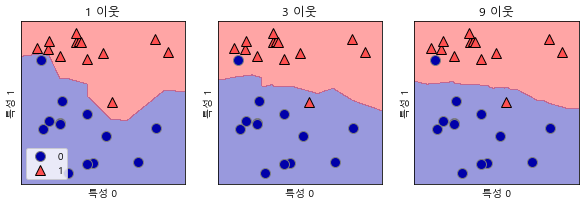

In [44]:
fig, axes = plt.subplots(1, 3, figsize = (10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    #fit 메소드는 self 오브젝트를 리턴합니다
    #그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps= 0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)